# 1.load the dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.rename(columns={" BMI ":"BMI",'Life expectancy ':'Life expectancy',
                  "under-five deaths ":"under-five deaths","Measles ":"Measles","Diphtheria ":"Diphtheria",
                  ' HIV/AIDS':"HIV/AIDS",
                  " thinness  1-19 years":"thinness 10-19 years"," thinness 5-9 years":"thinness 5-9 years"},inplace=True)

# 2.why svd and pca

<Axes: xlabel='Status', ylabel='Count'>

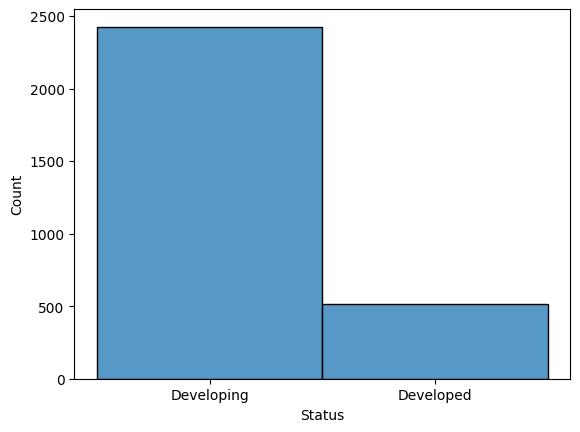

In [ ]:
import seaborn as sns
sns.histplot(df['Status'],kde=False)


In [ ]:
num_cols=df[['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']]
#making a list of all numerical value colums (excluding country names and year columns)

In [ ]:
num_cols.corr()
#printing correlation ,matrix of columns with respect to each other

<ipython-input-10-c1b8e571dc2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_cols.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [ ]:

covariance_matrix = num_cols.cov()

# Display the covariance matrix


print("Covariance Matrix:")
covariance_matrix

Covariance Matrix:


<ipython-input-11-f0ff379317af>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = num_cols.cov()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,2.128753e+01,7.466211e+00,-4.530099e+01,-2.035724e+01,-9.319021e-01,2.879982e+02,1.147744e+01,-4.364552e+03,1.007655e+01,-3.178497e+01,1.017423e+01,9.821331e-01,1.469466e+01,-3.273873e+00,6.676510e+03,4.771411e+06,-9.762649e-01,-1.059350e+00,0.236801,3.244621e+00
Life expectancy,7.466211e+00,9.070405e+01,-8.243093e+02,-2.211084e+02,1.566435e+01,7.240651e+03,5.412236e+01,-1.723845e+04,1.075074e+02,-3.405787e+02,1.035024e+02,5.161025e+00,1.079214e+02,-2.695626e+01,6.357257e+04,-1.292010e+07,-2.001529e+01,-2.017765e+01,1.431375,2.355586e+01
Adult Mortality,-4.530099e+01,-8.243093e+02,1.544852e+04,1.156193e+03,-9.939165e+01,-6.009727e+04,-4.804433e+02,4.450792e+04,-9.569895e+02,1.880456e+03,-7.980218e+02,-3.591276e+01,-8.088108e+02,3.311031e+02,-5.339286e+05,-1.074510e+08,1.658953e+02,1.723295e+02,-11.871124,-1.870545e+02
infant deaths,-2.035724e+01,-2.211084e+02,1.156193e+03,1.390666e+04,-5.627989e+01,-2.006989e+04,-5.866675e+02,6.776735e+05,-5.402210e+02,1.885700e+04,-4.730680e+02,-3.881121e+01,-4.914787e+02,1.510865e+01,-1.957971e+05,4.474351e+09,2.441097e+02,2.520228e+02,-3.679185,-7.815589e+01
Alcohol,-9.319021e-01,1.566435e+01,-9.939165e+01,-5.627989e+01,1.642205e+01,2.831145e+03,8.836352e+00,-2.454997e+03,2.675036e+01,-7.452989e+01,2.098374e+01,3.008681e+00,2.139245e+01,-1.035875e+00,2.065329e+04,-8.960531e+06,-7.731591e+00,-7.677407e+00,0.379128,7.216164e+00
percentage expenditure,2.879982e+02,7.240651e+03,-6.009727e+04,-2.006989e+04,2.831145e+03,3.951805e+06,6.460541e+02,-1.290153e+06,9.159427e+03,-2.802068e+04,6.877983e+03,8.964324e+02,6.790915e+03,-9.877866e+02,2.736831e+07,-3.389285e+09,-2.220087e+03,-2.278469e+03,164.211694,2.666523e+03
Hepatitis B,1.147744e+01,5.412236e+01,-4.804433e+02,-5.866675e+02,8.836352e+00,6.460541e+02,6.285057e+02,-2.881926e+04,7.520121e+01,-8.233259e+02,2.654561e+02,3.628483e+00,3.288785e+02,-1.446941e+01,2.681937e+04,-2.143913e+08,-1.292948e+01,-1.358915e+01,0.906997,1.643195e+01
Measles,-4.364552e+03,-1.723845e+04,4.450792e+04,6.776735e+05,-2.454997e+03,-1.290153e+06,-2.881926e+04,1.314983e+08,-4.067260e+04,9.343034e+05,-3.669537e+04,-3.118151e+03,-3.870720e+04,1.799181e+03,-1.209813e+07,1.873944e+11,1.145815e+04,1.149380e+04,-288.290230,-4.859362e+03
BMI,1.007655e+01,1.075074e+02,-9.569895e+02,-5.402210e+02,2.675036e+01,9.159427e+03,7.520121e+01,-4.067260e+04,4.017633e+02,-7.685319e+02,1.332090e+02,1.210224e+01,1.343270e+02,-2.493284e+01,8.628256e+04,-8.838424e+07,-4.713661e+01,-4.870468e+01,2.100044,3.539356e+01
under-five deaths,-3.178497e+01,-3.405787e+02,1.880456e+03,1.885700e+04,-7.452989e+01,-2.802068e+04,-8.233259e+02,9.343034e+05,-7.685319e+02,2.574277e+04,-7.116265e+02,-5.351628e+01,-7.469237e+02,3.100902e+01,-2.751755e+05,5.947125e+09,3.335774e+02,3.435245e+02,-5.628414,-1.148498e+02


In [ ]:
sns.pairplot(num_cols,diag_kind='kde')

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Status', markers=['o', 's'], palette={'Developed': 'blue', 'Developing': 'orange'})
plt.show()

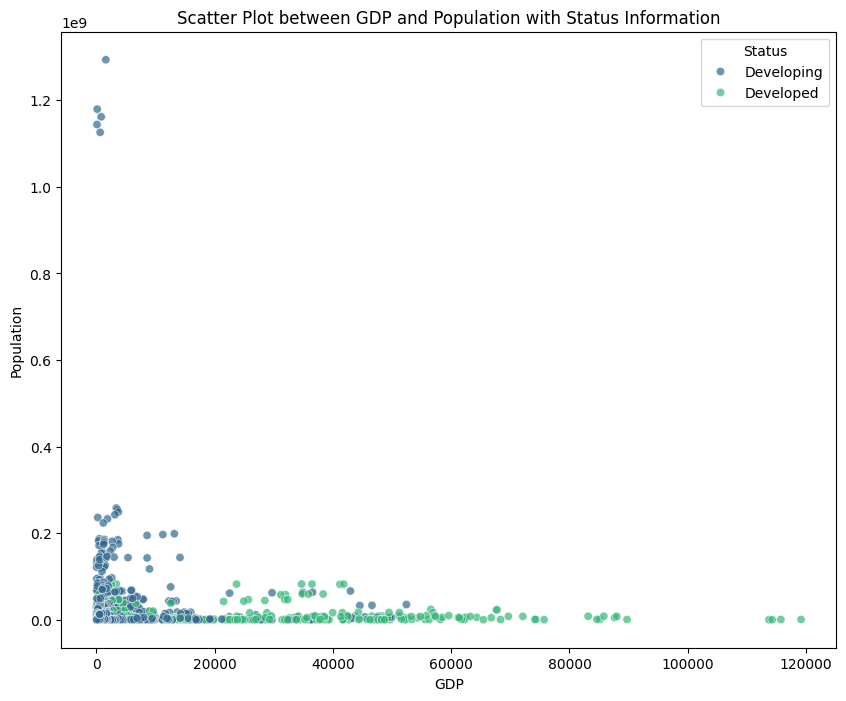

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'GDP'
feature2 = 'Population'

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=feature1, y=feature2, hue='Status', data=df, palette='viridis', alpha=0.7)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot between {feature1} and {feature2} with Status Information')

plt.legend(title='Status')

# Show the plot
plt.show()


# 3.Apply PCA and SVD

In [ ]:
#SVD

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


df.dropna(inplace=True)

X = df.drop(['Status','Country'], axis=1)
y = df['Status']

# Standardize the features
X_std = StandardScaler().fit_transform(X)
X_std = X_std.astype(np.float64)


In [ ]:



# (SVD)
U, Sigma, Vt = np.linalg.svd(X_std, full_matrices=False)

# deciding number of components(k)
desired_variance = 0.90
cumulative_explained_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
k = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to retain {desired_variance * 100}% variance: {k}")

# Keep only the top-k singular values and vectors
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]
print("shape of reduced U matrix",U_k.shape)
print("shape of reduced Singular matrix",Sigma_k.shape)
print("shape of reduced V matrix",Vt_k.shape)

# Reconstruct the data using the reduced SVD components
X_reconstructed = U_k.dot(Sigma_k)
X_reconstructed2=(X_std).dot(Vt_k.T)
print("shape of reduced reconstructed matrix",X_reconstructed2.shape)
# print(X_2)


Number of components to retain 90.0% variance: 11
shape of reduced U matrix (1649, 11)
shape of reduced Singular matrix (11, 11)
shape of reduced V matrix (11, 20)
shape of reduced reconstructed matrix (1649, 11)


In [ ]:
print(X_reconstructed)

[[-3.88661133 -0.21180361  0.9478715  ... -0.95814995 -0.30265613
   1.7862947 ]
 [-3.72185153  0.04760947  0.05959068 ... -1.02694563 -0.4315925
   0.31454981]
 [-3.77547659 -0.14967875 -0.13575916 ... -0.74683278 -0.38127993
   0.23260972]
 ...
 [-2.30520554  2.36755519  1.52908612 ...  0.38185435 -1.54195562
  -0.71400818]
 [-3.60996401  3.38076397  1.5714142  ...  0.9724252  -1.37485687
  -0.6149685 ]
 [-4.69144366  2.82302625  0.75307605 ...  0.18453999 -2.36241681
  -0.2712815 ]]


In [ ]:
import numpy as np

def svd_decomposition(A, k=None, epsilon=0.00001):

    n_orig, m_orig = A.shape
    if k is None:
        k=min(n_orig,m_orig)
    A_orig=A.copy()
    if n_orig > m_orig:
        A = A.T @ A
        n, m = A.shape
    elif n_orig < m_orig:
        A = A @ A.T
        n, m = A.shape
    else:
        n,m=n_orig, m_orig

    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
    # block power iteration
    for i in range(1000):
        Z = A @ Q
        Q, R = np.linalg.qr(Z)
        err = ((Q - Q_prev) ** 2).sum()
        Q_prev = Q
        if err < epsilon:
            break

    singular_values=np.sqrt(np.diag(R))
    if n_orig < m_orig:
        left_vecs=Q.T
        right_vecs=np.linalg.inv(np.diag(singular_values))@left_vecs.T@A_orig
    elif n_orig==m_orig:
        left_vecs=Q.T
        right_vecs=left_vecs
        singular_values=np.square(singular_values)
    else:
        right_vecs=Q.T
        left_vecs=A_orig@ right_vecs.T @np.linalg.inv(np.diag(singular_values))

    return left_vecs, singular_values, right_vecs

U, Sigma, Vt = svd_decomposition(X_std)


print("number of singular values",Sigma.shape)

# deciding number of components(k)
desired_variance = 0.90
cumulative_explained_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
k = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to retain {desired_variance * 100}% variance: {k}")

# Keep only the top-k singular values and vectors
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]
print("shape of reduced U matrix",U_k.shape)
print("shape of reduced Singular matrix",Sigma_k.shape)
print("shape of reduced V matrix",Vt_k.shape)

# Reconstruct the data using the reduced SVD components
X_reconstructed = U_k.dot(Sigma_k)
X_reconstructed2=(X_std).dot(Vt_k.T)
print("shape of reduced reconstructed matrix",X_reconstructed2.shape)
# print(X_2)



number of singular values (20,)
Number of components to retain 90.0% variance: 11
shape of reduced U matrix (1649, 11)
shape of reduced Singular matrix (11, 11)
shape of reduced V matrix (11, 20)
shape of reduced reconstructed matrix (1649, 11)


In [ ]:
import numpy as np

def calculU(M):
    B = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols]
def calculVt(M):
    B = np.dot(M.T, M)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols].T
#Function that calculates Eigenvalues corresponding to the Sigma Matrix
def calculSigma(M):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    eigenvalues = np.sqrt(eigenvalues)
    #Sorting in descending order as the svd function does
    return eigenvalues[::-1]
U = calculU(X_std)
Sigma = calculSigma(X_std)
Vt = calculVt(X_std)


# deciding number of components(k)
desired_variance = 0.90
cumulative_explained_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
k = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to retain {desired_variance * 100}% variance: {k}")
k=11
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]
print("shape of reduced U matrix",U_k.shape)
print("shape of reduced Singular matrix",Sigma_k.shape)
print("shape of reduced V matrix",Vt_k.shape)

# Reconstruct the data using the reduced SVD components
X_reconstructed = U_k.dot(Sigma_k)
X_reconstructed2=(X_std).dot(Vt_k.T)
print("shape of reduced reconstructed matrix",X_reconstructed2.shape)
# print(X_2)


Number of components to retain 90.0% variance: 20
shape of reduced U matrix (1649, 11)
shape of reduced Singular matrix (11, 11)
shape of reduced V matrix (11, 20)
shape of reduced reconstructed matrix (1649, 11)


In [ ]:
print(X_reconstructed)

[[ 3.88661133 -0.21180361 -0.94787161 ...  0.95814995  0.43826323
   1.7579462 ]
 [ 3.72185153  0.04760947 -0.0595905  ...  1.02694563  0.45436567
   0.28065193]
 [ 3.77547659 -0.14967875  0.13575938 ...  0.74683278  0.39793909
   0.20279581]
 ...
 [ 2.30520554  2.36755519 -1.52908472 ... -0.38185435  1.48288978
  -0.8297425 ]
 [ 3.60996401  3.38076397 -1.57141184 ... -0.9724252   1.32384724
  -0.71822427]
 [ 4.69144366  2.82302625 -0.75307332 ... -0.18453999  2.33478133
  -0.45100215]]


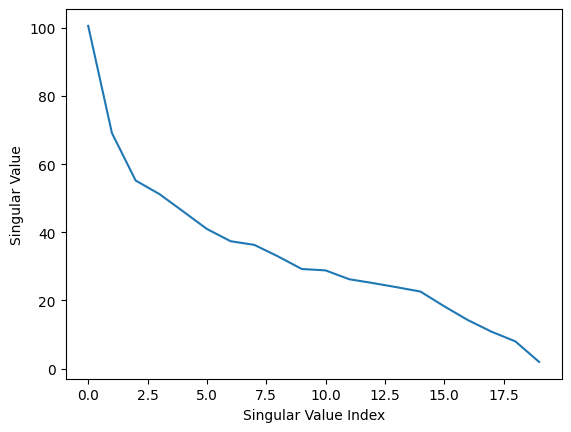

In [ ]:
plt.plot(Sigma)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

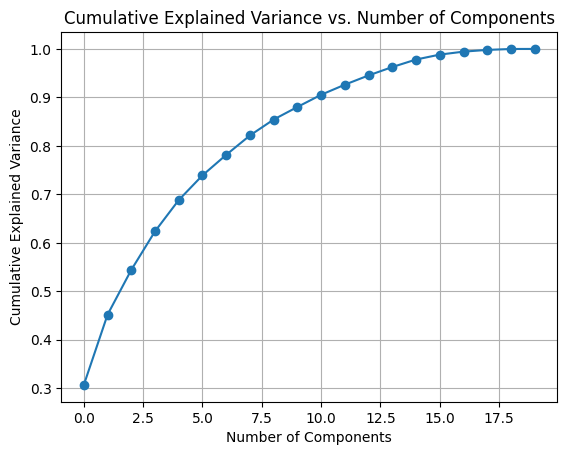

Number of components to retain 90.0% variance: 11


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

# Calculate Covariance Matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot the cumulative explained variance
import matplotlib.pyplot as plt

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Determine the number of components (k) to retain at least 90% of the variance
desired_variance = 0.90
k = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to retain {desired_variance * 100}% variance: {k}")


In [ ]:

top_eigenvalues = eigenvalues[:k]
top_eigenvectors = eigenvectors[:, :k]

# Dimensions of standardized_data
print("Dimensions of standardized_data:", standardized_data.shape)

# Dimensions of top_eigenvectors
print("Dimensions of top_eigenvectors:", top_eigenvectors.shape)

transformed_data = standardized_data.dot(top_eigenvectors)
print("Dimensions of transformed_data:", transformed_data.shape)




Dimensions of standardized_data: (1649, 20)
Dimensions of top_eigenvectors: (20, 11)
Dimensions of transformed_data: (1649, 11)


In [ ]:
transformed_data

array([[-3.88661133,  0.21180361, -0.9478715 , ...,  0.95814995,
        -0.30265613,  1.7862947 ],
       [-3.72185153, -0.04760947, -0.05959068, ...,  1.02694563,
        -0.4315925 ,  0.31454981],
       [-3.77547659,  0.14967875,  0.13575916, ...,  0.74683278,
        -0.38127993,  0.23260972],
       ...,
       [-2.30520554, -2.36755519, -1.52908612, ..., -0.38185435,
        -1.54195562, -0.71400818],
       [-3.60996401, -3.38076397, -1.5714142 , ..., -0.9724252 ,
        -1.37485687, -0.6149685 ],
       [-4.69144366, -2.82302625, -0.75307605, ..., -0.18453999,
        -2.36241681, -0.2712815 ]])

4.TSNE plot

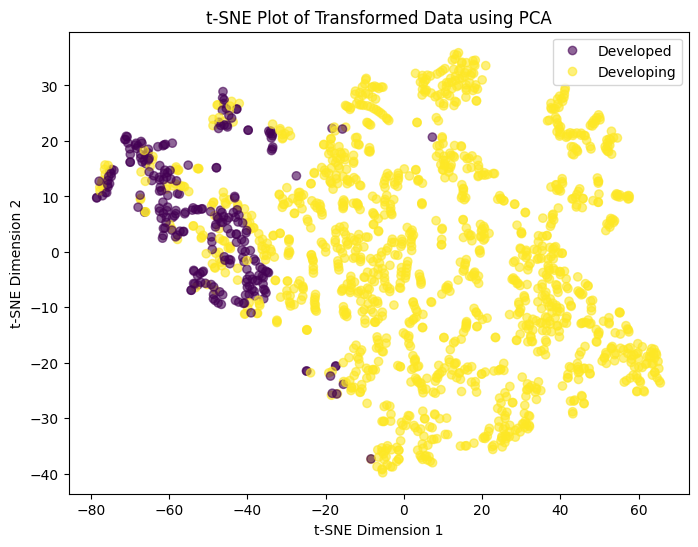

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#2D visualisation
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform your data using t-SNE
tsne_result = tsne.fit_transform(transformed_data)

# Map the 'status' labels to numeric values
label_mapping = {'Developed': 0, 'Developing': 1}
numeric_labels = df['Status'].map(label_mapping)

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=numeric_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot of Transformed Data using PCA')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend based on the numeric labels
legend_labels = list(label_mapping.keys())
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


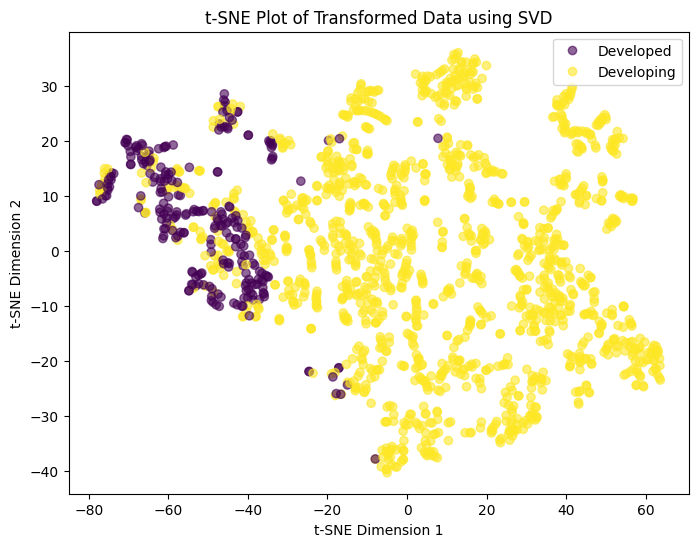

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#2D visualisation
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform your data using t-SNE
tsne_result = tsne.fit_transform(X_reconstructed)

# Map the 'status' labels to numeric values
label_mapping = {'Developed': 0, 'Developing': 1}
numeric_labels = df['Status'].map(label_mapping)

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=numeric_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot of Transformed Data using SVD')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend based on the numeric labels
legend_labels = list(label_mapping.keys())
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


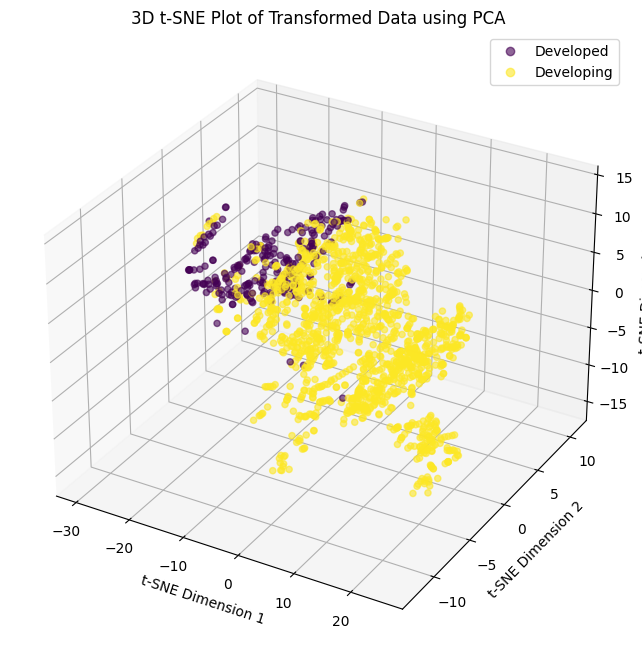

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3D
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform your data using t-SNE
tsne_result = tsne.fit_transform(transformed_data)

# Map the 'status' labels to numeric values
label_mapping = {'Developed': 0, 'Developing': 1}
numeric_labels = df['Status'].map(label_mapping)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=numeric_labels, cmap='viridis', alpha=0.6)
ax.set_title('3D t-SNE Plot of Transformed Data using PCA')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
legend_labels = list(label_mapping.keys())
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


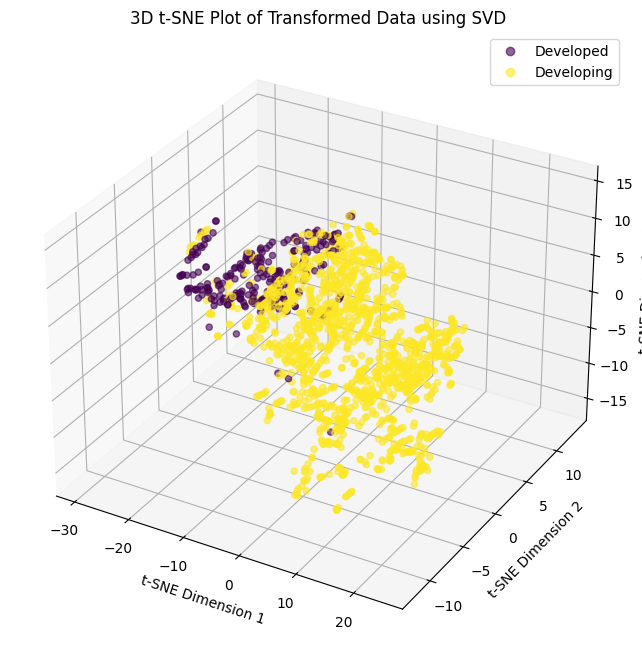

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3D
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform your data using t-SNE
tsne_result = tsne.fit_transform(X_reconstructed)

# Map the 'status' labels to numeric values
label_mapping = {'Developed': 0, 'Developing': 1}
numeric_labels = df['Status'].map(label_mapping)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=numeric_labels, cmap='viridis', alpha=0.6)
ax.set_title('3D t-SNE Plot of Transformed Data using SVD')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
legend_labels = list(label_mapping.keys())
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(['Status', 'Country'], axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("using original data")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


using original data
Accuracy: 0.7998
Confusion Matrix:
 [[ 208   31]
 [ 296 1098]]
Classification Report:
               precision    recall  f1-score   support

   Developed       0.41      0.87      0.56       239
  Developing       0.97      0.79      0.87      1394

    accuracy                           0.80      1633
   macro avg       0.69      0.83      0.72      1633
weighted avg       0.89      0.80      0.82      1633



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = X_reconstructed
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("using transformed data")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


using transformed data
Accuracy: 0.9273
Confusion Matrix:
 [[ 73  25]
 [ 23 539]]
Classification Report:
               precision    recall  f1-score   support

   Developed       0.76      0.74      0.75        98
  Developing       0.96      0.96      0.96       562

    accuracy                           0.93       660
   macro avg       0.86      0.85      0.85       660
weighted avg       0.93      0.93      0.93       660

